In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df=pd.read_json('/content/TelecomX_Data.json')
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [27]:
# Normalizar cada parte
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar todo
df_normalizado = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

# Mostrar resultado
print(df_normalizado.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [28]:
print(df_normalizado['Churn'].unique())


['No' 'Yes' '']


In [29]:
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print(df_normalizado['Churn'].unique())


['No' 'Yes']


In [30]:
df_normalizado.isna().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [31]:
df_normalizado.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


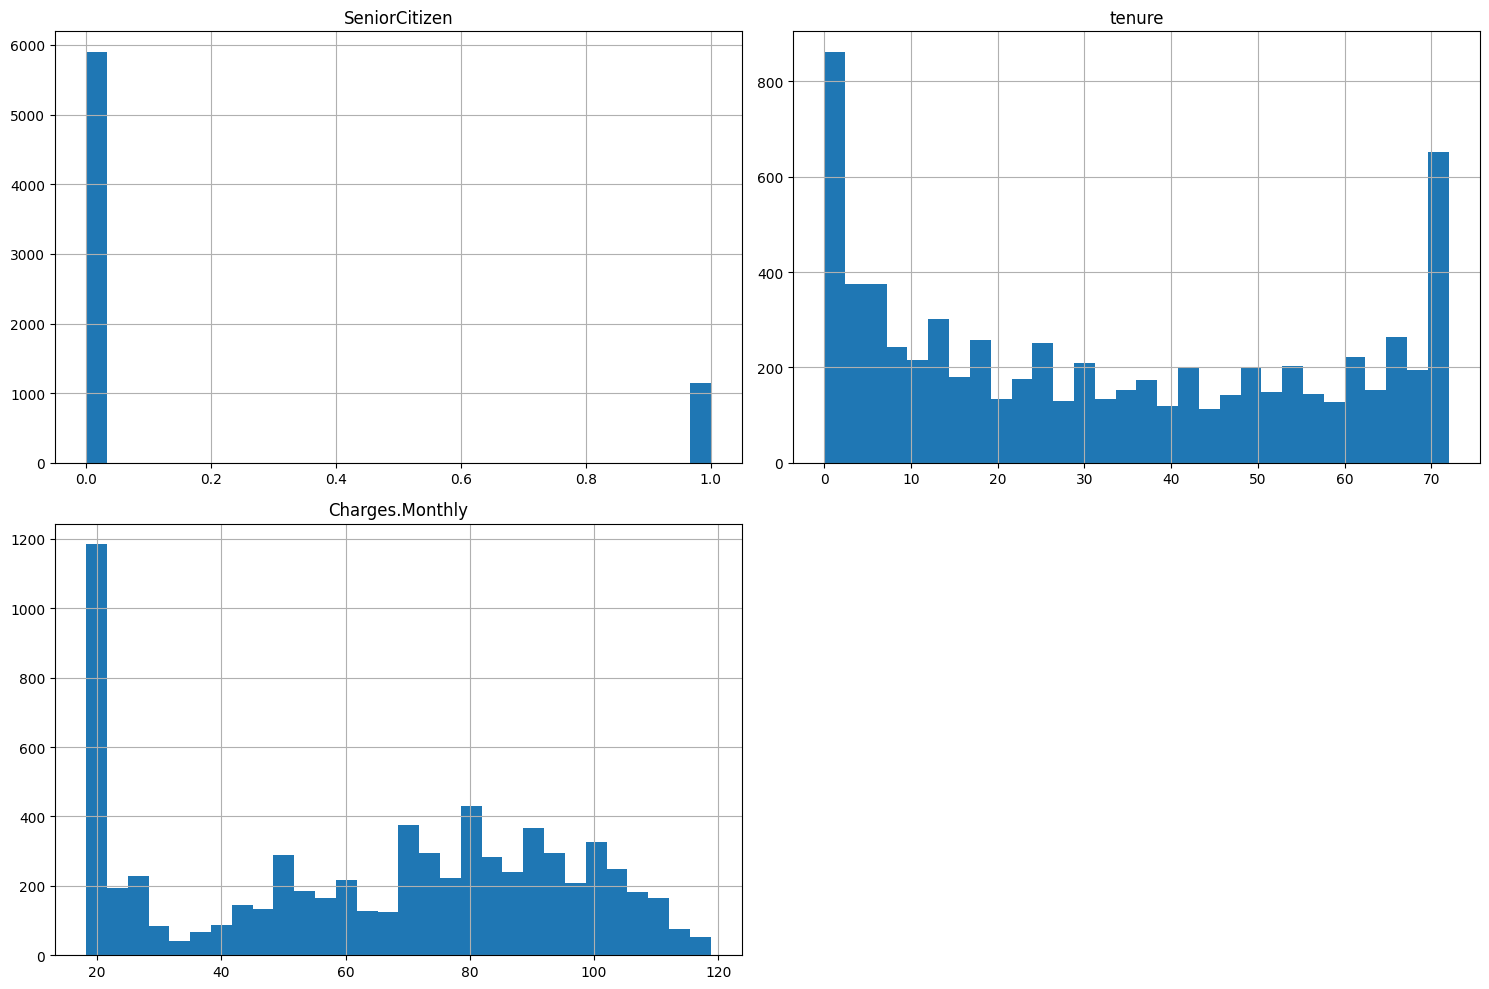

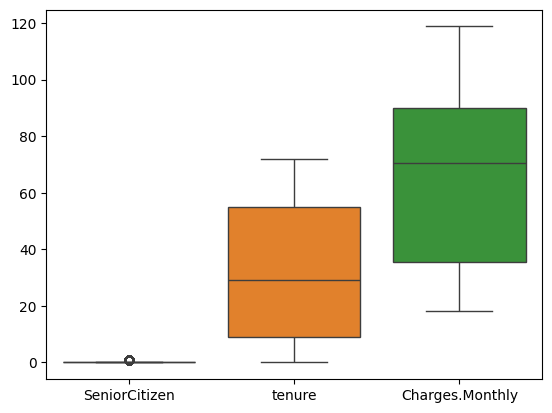

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
df_normalizado.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplot para detectar outliers
sns.boxplot(data=df_normalizado)
plt.show()


The tenure is the months that the client has a contract, so the median is close the 30 months, the clients belong to more than 2 years and a half.

The monthly charge to the clients pays the median is 70-75 the most clients pay 40-100 each month


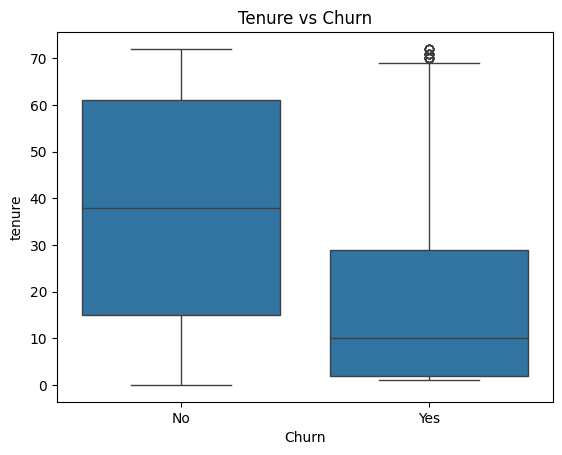

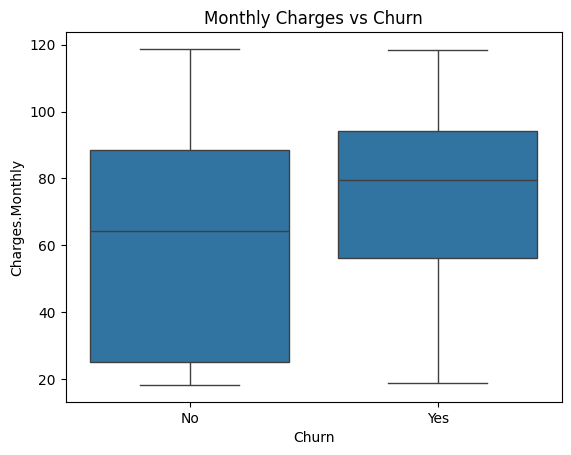

In [33]:
sns.boxplot(x='Churn', y='tenure', data=df_normalizado)
plt.title('Tenure vs Churn')
plt.show()

sns.boxplot(x='Churn', y='Charges.Monthly', data=df_normalizado)
plt.title('Monthly Charges vs Churn')
plt.show()







The clients who don’t leave the company, a median number of months that they have contracted with the company is closer to 40 months. Many clients have more than 20 months, which indicates good loyalty. and the other hand, the clients to leave the company the median is 10 months, which indicates that most don’t last more than 1 year

The analysis showed that the clients to leave the company pay a lot in comparison to the clients that has a contract with the company, because the median for clients to leave the company is 80 dollars, and for clients to don’t leave the company is 60 dollars even this clients minimum values closers to 25 dollars, this suggests that the clients mustn’t have pay a lot because they don’t meet their expectations

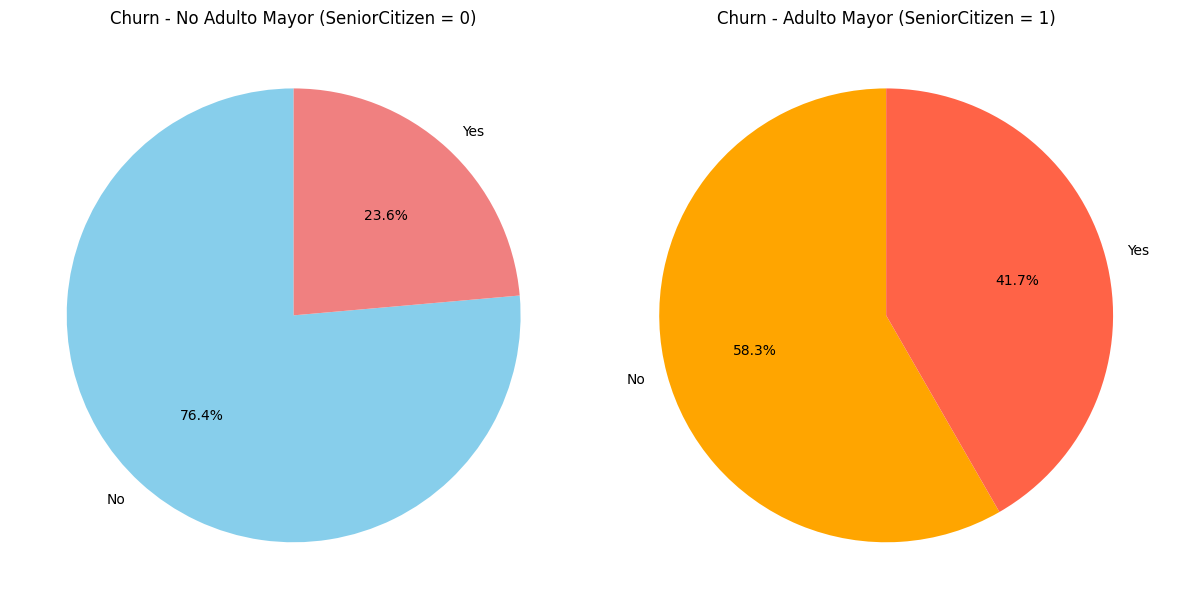

In [34]:
import matplotlib.pyplot as plt


no_senior = df_normalizado[df_normalizado['SeniorCitizen'] == 0]
senior = df_normalizado[df_normalizado['SeniorCitizen'] == 1]

# Contar churn en cada grupo
churn_no_senior = no_senior['Churn'].value_counts()
churn_senior = senior['Churn'].value_counts()

# Crear figura con 2 gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de torta para NO adultos mayores
axes[0].pie(churn_no_senior, labels=churn_no_senior.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
axes[0].set_title('Churn - No Adulto Mayor (SeniorCitizen = 0)')

# Gráfico de torta para adultos mayores
axes[1].pie(churn_senior, labels=churn_senior.index, autopct='%1.1f%%', colors=['orange', 'tomato'], startangle=90)
axes[1].set_title('Churn - Adulto Mayor (SeniorCitizen = 1)')

plt.tight_layout()
plt.show()


This analysis compares the turnover rate of older adults, comparing two groups: older adults and those under 65. Among those under 65, 76.4% do not leave the company, and 23.6% leave. The other group, older adults, does not leave the company (58.3%) and does leave (41.7%). Therefore, this analysis shows that older adults are more likely to leave the company.

In [44]:

df_normalizado['Cuentas_Diarias'] = df_normalizado['Charges.Monthly'] / 30

# Ver primeros valores
print(df_normalizado[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())


   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6         2.186667
1  0003-MKNFE             59.9         1.996667
2  0004-TLHLJ             73.9         2.463333
3  0011-IGKFF             98.0         3.266667
4  0013-EXCHZ             83.9         2.796667


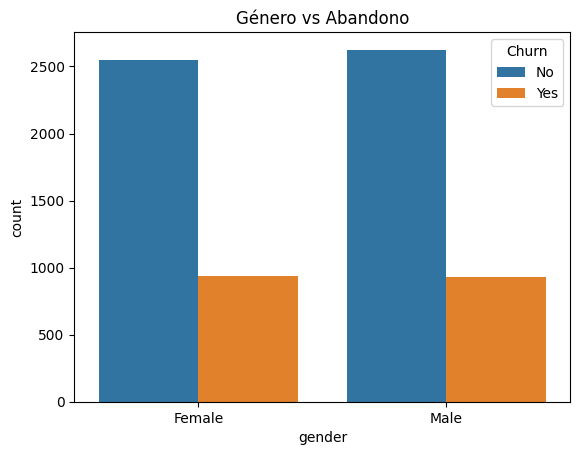

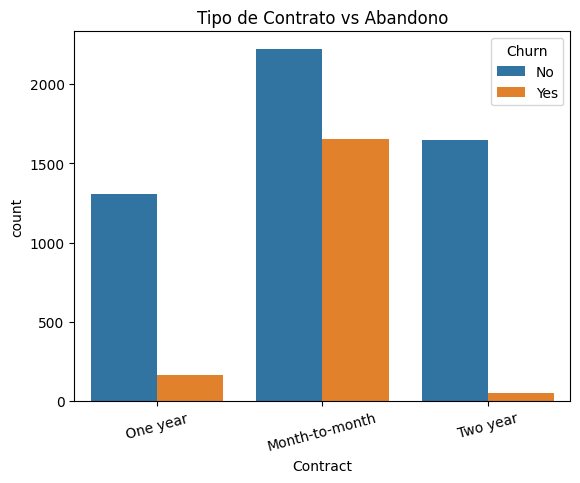

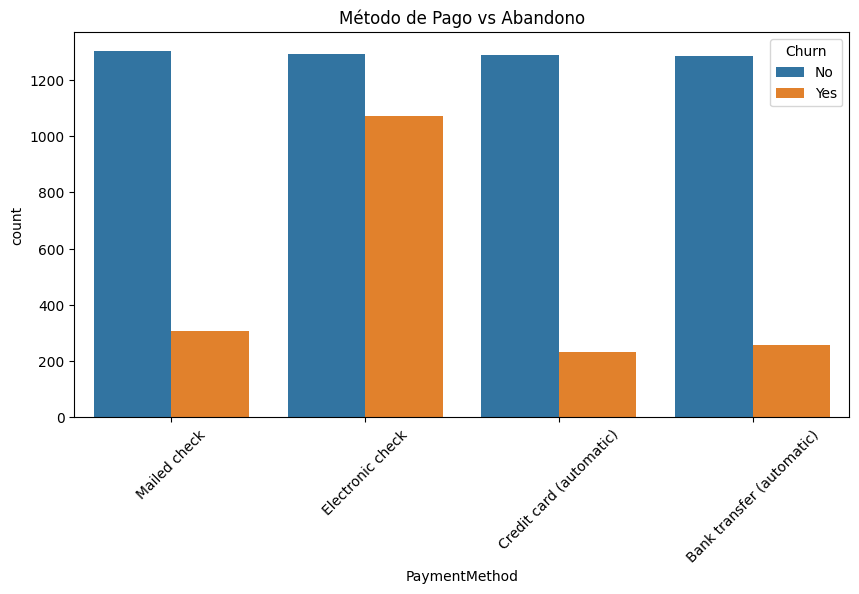

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Género vs Churn
sns.countplot(data=df_normalizado, x='gender', hue='Churn')
plt.title('Género vs Abandono')
plt.show()

# Tipo de contrato vs Churn
sns.countplot(data=df_normalizado, x='Contract', hue='Churn')
plt.title('Tipo de Contrato vs Abandono')
plt.xticks(rotation=15)
plt.show()

# Método de pago vs Churn
plt.figure(figsize=(10, 5))
sns.countplot(data=df_normalizado, x='PaymentMethod', hue='Churn')
plt.title('Método de Pago vs Abandono')
plt.xticks(rotation=45)
plt.show()


The gender doesn’t have a direct correlation with the churn. The type of contract tells us that most clients to leave the company are Month to Month contract, but the clients prefer this contract Month to Month, and The payment method to clients prefer to leave the company is the electronic check, which isn’t an automatic payment

Strategic recommendations
1. Loyalty programs for new customers:
It’s essential to focus retention efforts within the first 12 months of a customer’s lifecycle, as this is when churn is most likely to occur. Implementing loyalty programs with special offers, personalized service, or tiered benefits that grow with time can help strengthen customer engagement and increase retention during this critical period.

2. Review of pricing and perceived value:
Customers who are paying higher monthly charges tend to leave more often, possibly because they don’t perceive enough value in return. Conducting plan evaluations and offering personalized discounts, added features, or tailored packages could help these customers feel that their investment is worthwhile, reducing the likelihood of cancellation.

3. Personalized support for senior citizens:
Senior customers (65+) are more likely to churn, suggesting that the service may not be fully aligned with their needs. Providing simplified plans, exclusive customer support channels, or dedicated onboarding material for this segment could enhance satisfaction and reduce churn among older clients.

4. Encourage long-term contracts:
While month-to-month contracts are popular, they are associated with higher churn. Encouraging customers to choose annual or biennial contracts by offering incentives such as price discounts, premium support, or bundled services can promote long-term commitment and reduce volatility.

5. Promote automatic payment methods:
Clients using electronic checks—often a manual process—are more likely to cancel. Promoting automated payment options such as debit or credit cards, or direct bank withdrawals, could improve convenience and foster a stronger sense of commitment. Incentives like discounts or rewards for using auto-pay could be effective.

6. Proactive churn risk segmentation:
Leverage predictive models using key features like tenure, monthly charges, and contract type to identify at-risk customers. Early detection allows for timely and targeted interventions—such as proactive customer service, exclusive offers, or plan optimizations—to prevent churn before it happens.